## 개요 ##
- 파마 인디언 당뇨병 데이터의 속성은 임신 횟수, BMI, 인슐린 수치, 나이, 이완기 혈압, 혈당, 당뇨병 가족력, 나이, 당뇨병 여부 컬럼이 있다.
- 이 데이터는 당뇨병 진단을 위한 미국 국가건강검진 프로그램에 참여한 21세 이상의 파마 인디언 출신 여성 786명의 데이터로 구성돼 있다.
- 타겟 데이터는 당뇨병 발병 여부로 하고, 나머지 데이터를 입력 특징으로 지정한다.
- 훈련 데이터와 테스트 데이터는 7:3으로 정한다.
- 훈련 모델은 로지스틱 회귀 모델 사용

In [1]:
# data import

# 데이터 정보 확인 

# 당뇨병 발병 여부 빈도수 바 차트 

# 통계치 확인 

# 0이 존재하는 컬럼 확인 

# 산점도 그래프 x =age y = blood pressure

# 산점도 그래프 x =blood pressure y = insulin

# 전체 컬럼 박스 플롯  시각화: orient='h'



In [27]:
# 데이터 로드
import pandas as pd

df = pd.read_csv("./diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# 데이터 구성
df.shape


(768, 9)

In [64]:
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ':', missing_rows)
    
# pregnancy 와 outcome 은 0 값이 있는게 정상 


Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [46]:
# 지진의 type 속성 확인
# 지진 데이터는 지진 뿐만 아니라 폭발, 핵폭발, 로켓폭발 등의 데이터도 담는다
df['Outcome'].value_counts()
outcome_counts = df["Outcome"].value_counts(normalize=True) 

#  비율 체크 = 0.6 ~ 0.34 


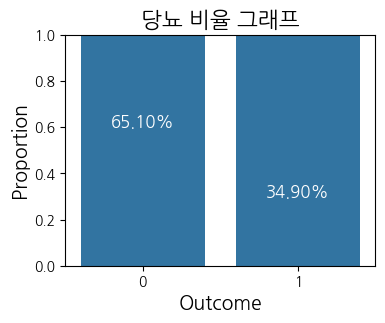

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib as kor_mat

# 누적 막대 그래프
plt.figure(figsize=(4, 3))
sns.countplot(x="Outcome", data=df)

plt.title("당뇨 비율 그래프", fontsize=16)
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.ylim(0, 1)  # 비율이므로 y축 범위는 0~1로 설정

for i, v in enumerate(outcome_counts):
    plt.text(i, v - 0.05, f"{v:.2%}", ha="center", fontsize=12, color="white")

plt.show()


In [62]:
df.describe()

#  중요함 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


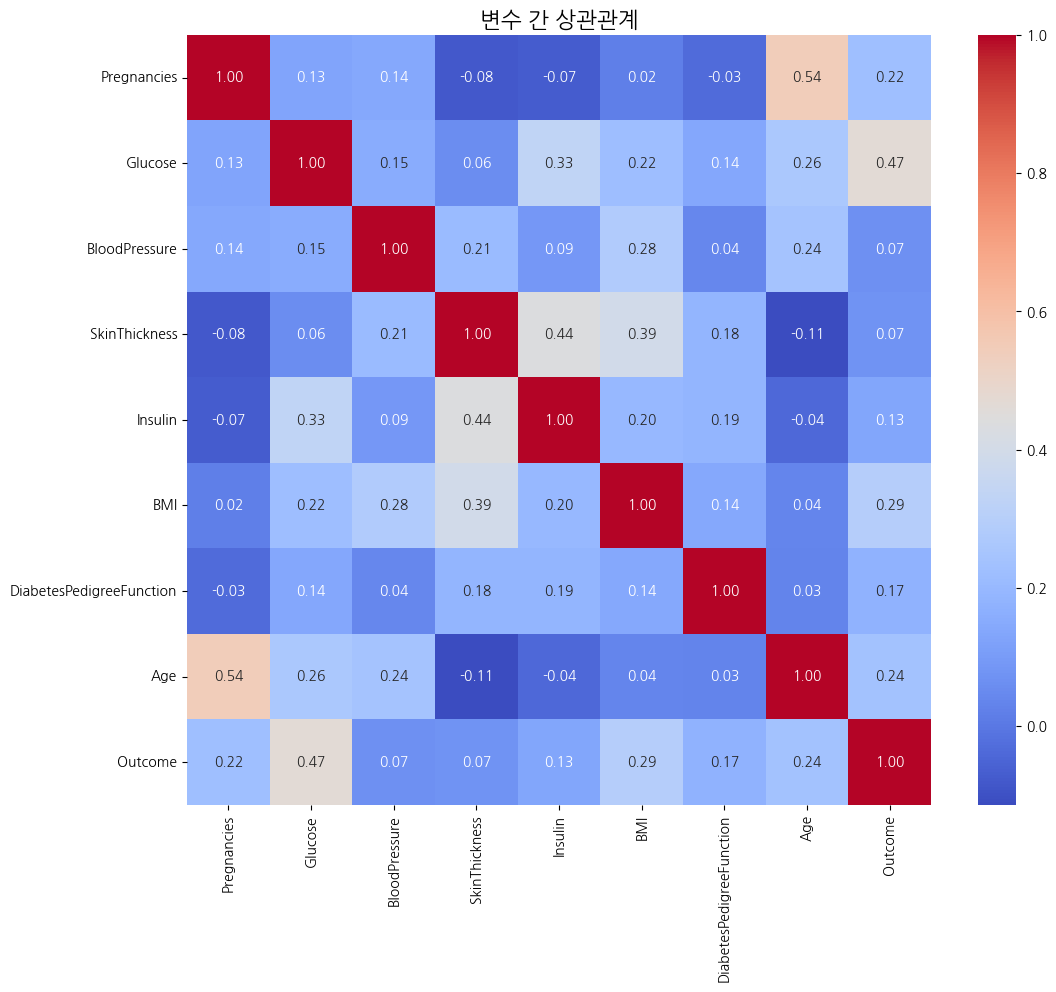

In [54]:
plt.figure(figsize=(12, 10))
correlation = df.corr()  # 상관계수 계산
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("변수 간 상관관계", fontsize=16)
plt.show()


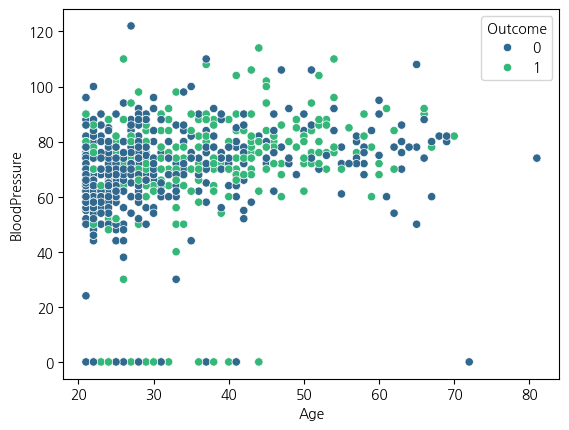

In [68]:
sns.scatterplot(data=df, x="Age", y="BloodPressure", hue="Outcome", palette="viridis")

plt.show()

#  혈압과 나이 비교시 이상치가 아래로 깔린다. 

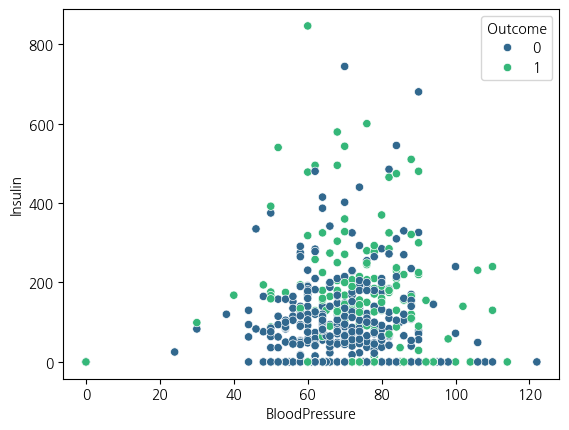

In [69]:
sns.scatterplot(data=df, x="BloodPressure", y="Insulin", hue="Outcome", palette="viridis")


plt.show()


<Axes: >

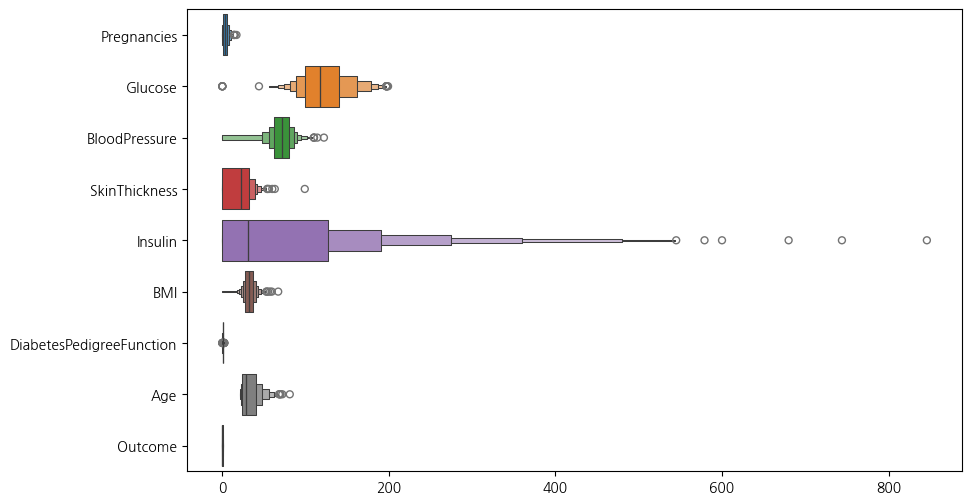

In [70]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df, orient="h")

#  이러면 전체 출력 

In [71]:
# 박스 플롯 그래프의 최대치와 최소치를 나눠서 이상치를 잘라내고 다시 파일 생성 
Preg_range = (df.Pregnancies >= 0) & (df.Pregnancies <= 13.5)
Gluc_range = (df.Glucose >= 16.75) & (df.Glucose <= 202.75)
Bloo_range = (df.BloodPressure >= 35) & (df.BloodPressure <= 107)
Skin_range = (df.SkinThickness >= 1) & (df.SkinThickness <= 80)
Insu_range = (df.Insulin >= 1) & (df.Insulin <= 318.75)
BMI_range = (df.BMI >= 13.35) & (df.BMI <= 50.55)
diab_range = (df.DiabetesPedigreeFunction >= 0) & (df.DiabetesPedigreeFunction <= 1.23)
Age_range = (df.Age >= 21) & (df.Age <= 65.5)
df2 = df.loc[
    Preg_range
    & Gluc_range
    & Bloo_range
    & Skin_range
    & Insu_range
    & BMI_range
    & diab_range
    & Age_range,
    :,
]
df2.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
19,1,115,70,30,96,34.6,0.529,32,1


In [80]:
# 입력 세트와 타겟 세트 정의
X = df2.drop("Outcome", axis=1)
y = df2["Outcome"]

print(X.shape, y.shape)


(333, 8) (333,)


In [81]:
# 최소값과 최대값을 사용한 범의 한정 정규화
# 예시

import numpy as np

x = np.array([10, 20, 30, 40, 50, 60])
x_scaled = (x - x.min()) / (x.max() - x.min())

print("원본 데이터: ", x)
print("스케일링 데이터: ", x_scaled)

# 요소를 늘려도 x_scaled 값은 0 ~ 1 사이의 값을 갖는다.


원본 데이터:  [10 20 30 40 50 60]
스케일링 데이터:  [0.  0.2 0.4 0.6 0.8 1. ]


In [83]:
# 타겟값 정규화
X_scaled = (X - X.min()) / (X.max() - X.min())
X_scaled.head() 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,0.076923,0.232394,0.411765,0.301887,0.260726,0.314286,0.071993,0.000000
6,0.230769,0.154930,0.176471,0.471698,0.240924,0.406349,0.143108,0.119048
14,0.384615,0.774648,0.500000,0.226415,0.528053,0.241270,0.440737,0.714286
16,0.000000,0.436620,0.676471,0.754717,0.709571,0.876190,0.409131,0.238095
19,0.076923,0.415493,0.470588,0.433962,0.267327,0.520635,0.389816,0.261905


In [84]:
# 훈련 세트(X_train, X_test)와 데이터 세트(y_train, y_test)를 7:3으로 분리
# 사용되는 데이터는 X_scaled, y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(233, 8) (233,)
(100, 8) (100,)


In [85]:
# 로지스틱 회귀 모델 학습 
from sklearn.linear_model import LogisticRegression

# soliver 최적화에 사용되는 알고리즘. lbfgs로 설정하면 제한된 메모리를 사용해 최적화된 메모리 절약 
# 대용량 데이터 학습에는 설정 안한다. 
model = LogisticRegression(solver='lbfgs', random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [87]:
# 회귀 계수와 절편 

w = model.coef_
b = model.intercept_

print(np.round(w,2), np.round(b,2))

[[0.79 2.96 0.32 0.48 1.09 0.77 0.87 0.85]] [-4.35]


In [88]:
# 모델 성능 확인 
print('훈련 데이터 학습 모델 정확도', model.score(X_train,y_train))
print('테스트 데이터 학습 모델 정확도', model.score(X_test,y_test))

훈련 데이터 학습 모델 정확도 0.8111587982832618
테스트 데이터 학습 모델 정확도 0.79


In [89]:
# 테스트 데이터를 이용해 모델 예측하기 
y_pred = model.predict(X_test)

print(y_pred[5:10],"예측데이터")
print(y_test[5:10],"실체데이터")

[0 0 1 0 0] 예측데이터
680    0
648    1
427    1
497    0
462    0
Name: Outcome, dtype: int64 실체데이터


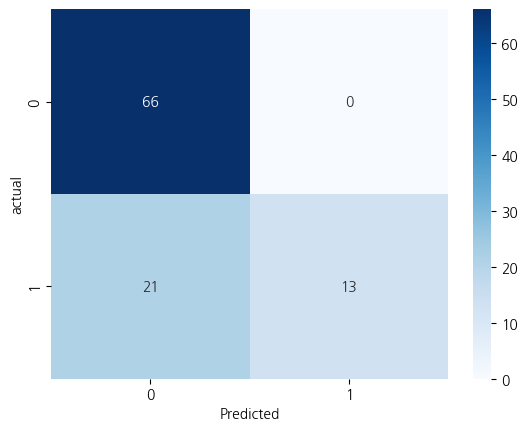

In [90]:
# 혼돈 행렬을 통해 테스트 데이터의 예측 값이 실제 값을 얼마나 예측했는지 확인 
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf, annot=True, cmap='Blues', fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

plt.show()

In [91]:
y.value_counts()

Outcome
0    238
1     95
Name: count, dtype: int64

In [94]:
# 오버 샘플링을 위해 SMOTE 객체를 이용, 불균형이 있는 클래스의 데이터를 생성한다.
# SMOTE(Synthetic Minority Over-sampling Technique)는 소수 클래스의 데이터를 합성하여 데이터셋의 클래스 간 균형을 맞추는 방법이다.
# 참조: https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X2, y2 = oversample.fit_resample(X,y)

y2.value_counts()

Outcome
0    238
1    238
Name: count, dtype: int64

In [95]:
# 타겟값 정규화
X2_scaled = (X2 - X2.min()) / (X2.max() - X2.min())
X2_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.076923,0.232394,0.411765,0.301887,0.260726,0.314286,0.071993,0.000000
1,0.230769,0.154930,0.176471,0.471698,0.240924,0.406349,0.143108,0.119048
2,0.384615,0.774648,0.500000,0.226415,0.528053,0.241270,0.440737,0.714286
3,0.000000,0.436620,0.676471,0.754717,0.709571,0.876190,0.409131,0.238095
4,0.076923,0.415493,0.470588,0.433962,0.267327,0.520635,0.389816,0.261905


In [96]:
# 오버 샘플링 데이터 훈련, 테스트 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X2_scaled, y2, test_size=0.3, random_state=42
)


In [98]:
# 개선된 로지스틱 모델 훈련 

model2 = LogisticRegression(solver="lbfgs", random_state=42)
model2.fit(X_train, y_train)

print("훈련 데이터 학습 모델 정확도", model2.score(X_train, y_train))
print("테스트 데이터 학습 모델 정확도", model2.score(X_test, y_test))

훈련 데이터 학습 모델 정확도 0.8018018018018018
테스트 데이터 학습 모델 정확도 0.7692307692307693


In [99]:
# 개선된 모델 평가 
from sklearn import metrics
y_pred2 = model2.predict(X_test)

print('테스트 데이터 성능 평가:', metrics.accuracy_score(y_test,y_pred2))

테스트 데이터 성능 평가: 0.7692307692307693


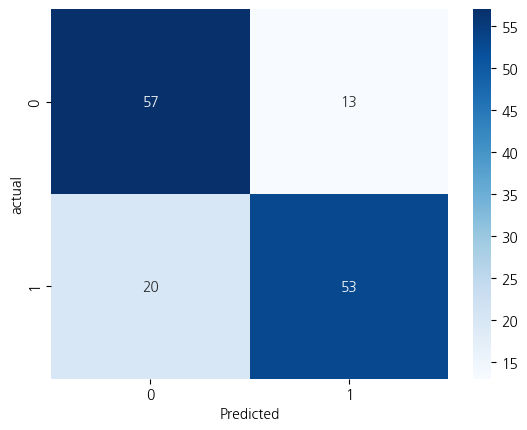

In [100]:
# 혼돈 행렬을 통해 테스트 데이터의 예측 값이 실제 값을 얼마나 예측했는지 확인
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("actual")

plt.show()


In [102]:
# 모델의 활용
columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]


# 초기 데이터 생성
df_new = pd.DataFrame(columns=columns)


# 데이터 삽입
data = [
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],
]

for row in data:
    df_new.loc[len(df_new)] = row
    
    print(df_new)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  


In [103]:
# 타겟값 정규화
df_new_scaled = (df_new - X2.min()) / (X2.max() - X2.min())
df_new_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.647887,0.500000,0.528302,-0.049505,0.488889,0.475856,0.690476
1,0.076923,0.204225,0.411765,0.415094,-0.049505,0.266667,0.233538,0.238095


In [104]:
# 모델 예측 
print(model2.predict(df_new_scaled))

[1 0]


In [ ]:
#훈련 모델 추출 
import pickle

# 모델 저장 
with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)
    
print("저장완료")